In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("C:/Users/vikas/OneDrive/Desktop/ml data/time series forecasting/hyundai stocks.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.101563,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.289063,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.398438,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.210938,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.562500,888701
...,...,...,...,...,...,...,...
1598,2022-07-11,180000.0,182000.0,179000.0,179000.0,179000.000000,660814
1599,2022-07-12,180000.0,181500.0,177000.0,179000.0,179000.000000,539027
1600,2022-07-13,180000.0,185000.0,178500.0,183500.0,183500.000000,941277
1601,2022-07-14,183000.0,184500.0,180500.0,182500.0,182500.000000,780637


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1603 non-null   object 
 1   Open       1603 non-null   float64
 2   High       1603 non-null   float64
 3   Low        1603 non-null   float64
 4   Close      1603 non-null   float64
 5   Adj Close  1603 non-null   float64
 6   Volume     1603 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.8+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1603.0,154459.950094,3.757736e+04,67200.000000,128500.0000,145000.000000,176000.000000,2.710000e+05
High,1603.0,156520.586400,3.801518e+04,71000.000000,130500.0000,147000.000000,178500.000000,2.890000e+05
Low,1603.0,152471.740487,3.704085e+04,65000.000000,127000.0000,143500.000000,173250.000000,2.595000e+05
Close,1603.0,154466.188397,3.743205e+04,65900.000000,128750.0000,144500.000000,176000.000000,2.675000e+05
Adj Close,1603.0,143966.175716,3.995065e+04,63380.367188,116526.5625,128477.992188,172568.484375,2.614108e+05
Volume,1603.0,898380.050530,1.034027e+06,0.000000,425364.0000,595219.000000,946844.500000,1.993370e+07


In [6]:
df=df.set_index("Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.101563,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.289063,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.398438,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.210938,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.562500,888701
...,...,...,...,...,...,...
2022-07-11,180000.0,182000.0,179000.0,179000.0,179000.000000,660814
2022-07-12,180000.0,181500.0,177000.0,179000.0,179000.000000,539027
2022-07-13,180000.0,185000.0,178500.0,183500.0,183500.000000,941277


In [7]:
newdf=df[["Open","High","Low","Close","Adj Close","Volume"]].agg(["max","min"])
newdf

,Open,High,Low,Close,Adj Close,Volume
max,271000.0,289000.0,259500.0,267500.0,261410.781250,19933702
min,67200.0,71000.0,65000.0,65900.0,63380.367188,0


C:\Users\vikas\AppData\Local\Temp/ipykernel_14352/75550326.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf[newdf.columns[z]],color="black")
C:\Users\vikas\AppData\Local\Temp/ipykernel_14352/75550326.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf[newdf.columns[z]],color="blac

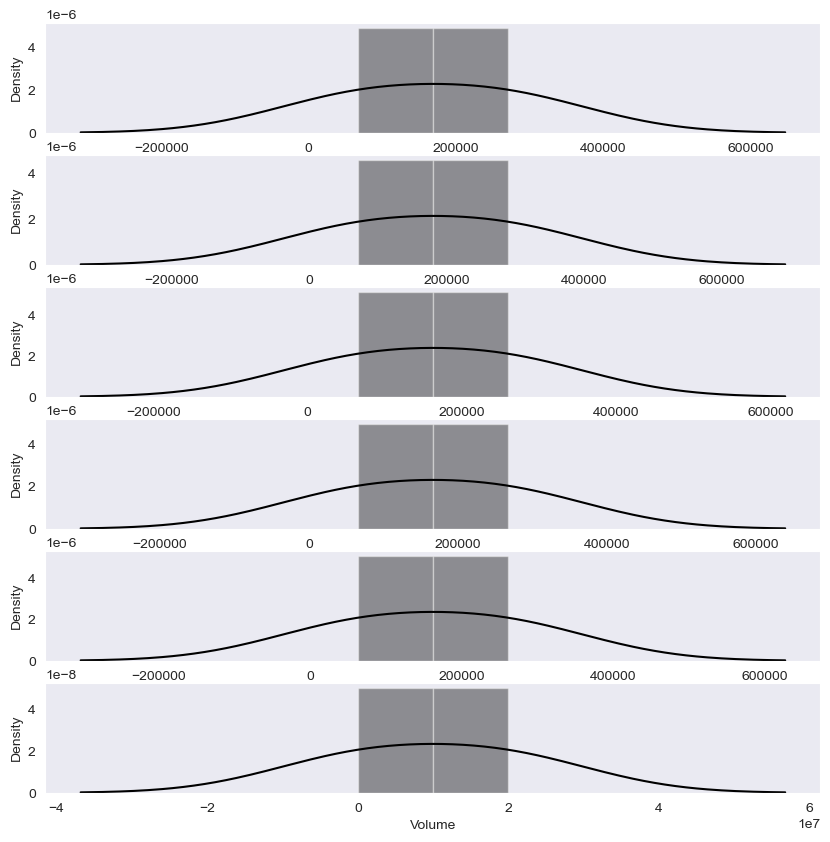

In [53]:
plt.figure(figsize=(10,10))
for z in range(len(newdf.columns)):
    plt.subplot(6,1,z+1)
    sns.distplot(newdf[newdf.columns[z]],color="black")

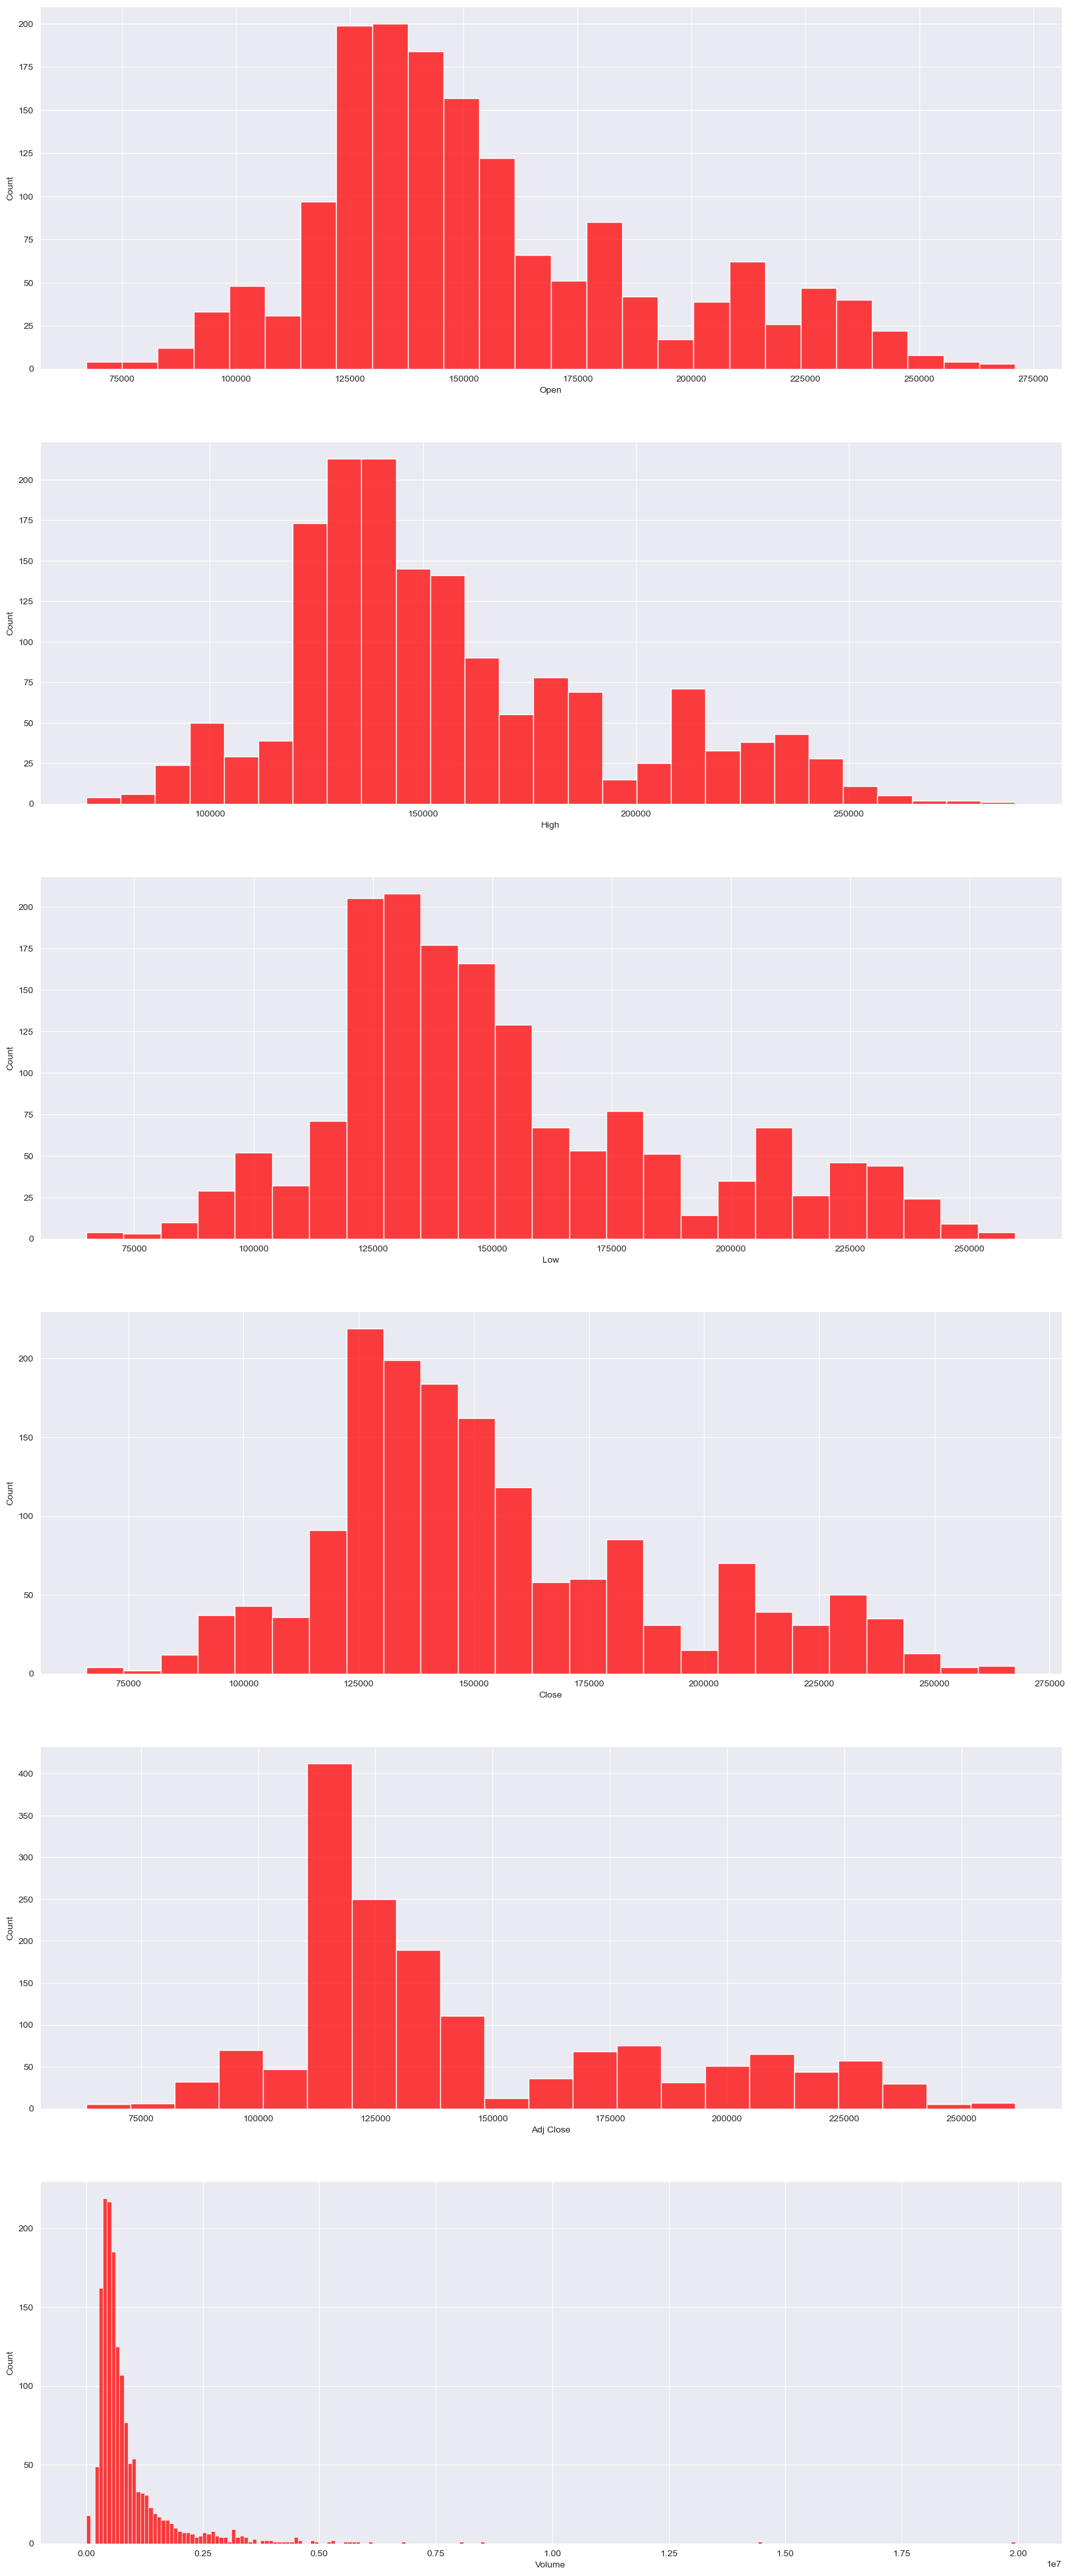

In [34]:
plt.figure(figsize=(20,50))
sns.set_style("darkgrid")
for k in range(len(df.columns)):
    plt.subplot(6,1,k+1)
    sns.histplot(df[df.columns[k]],color="red")

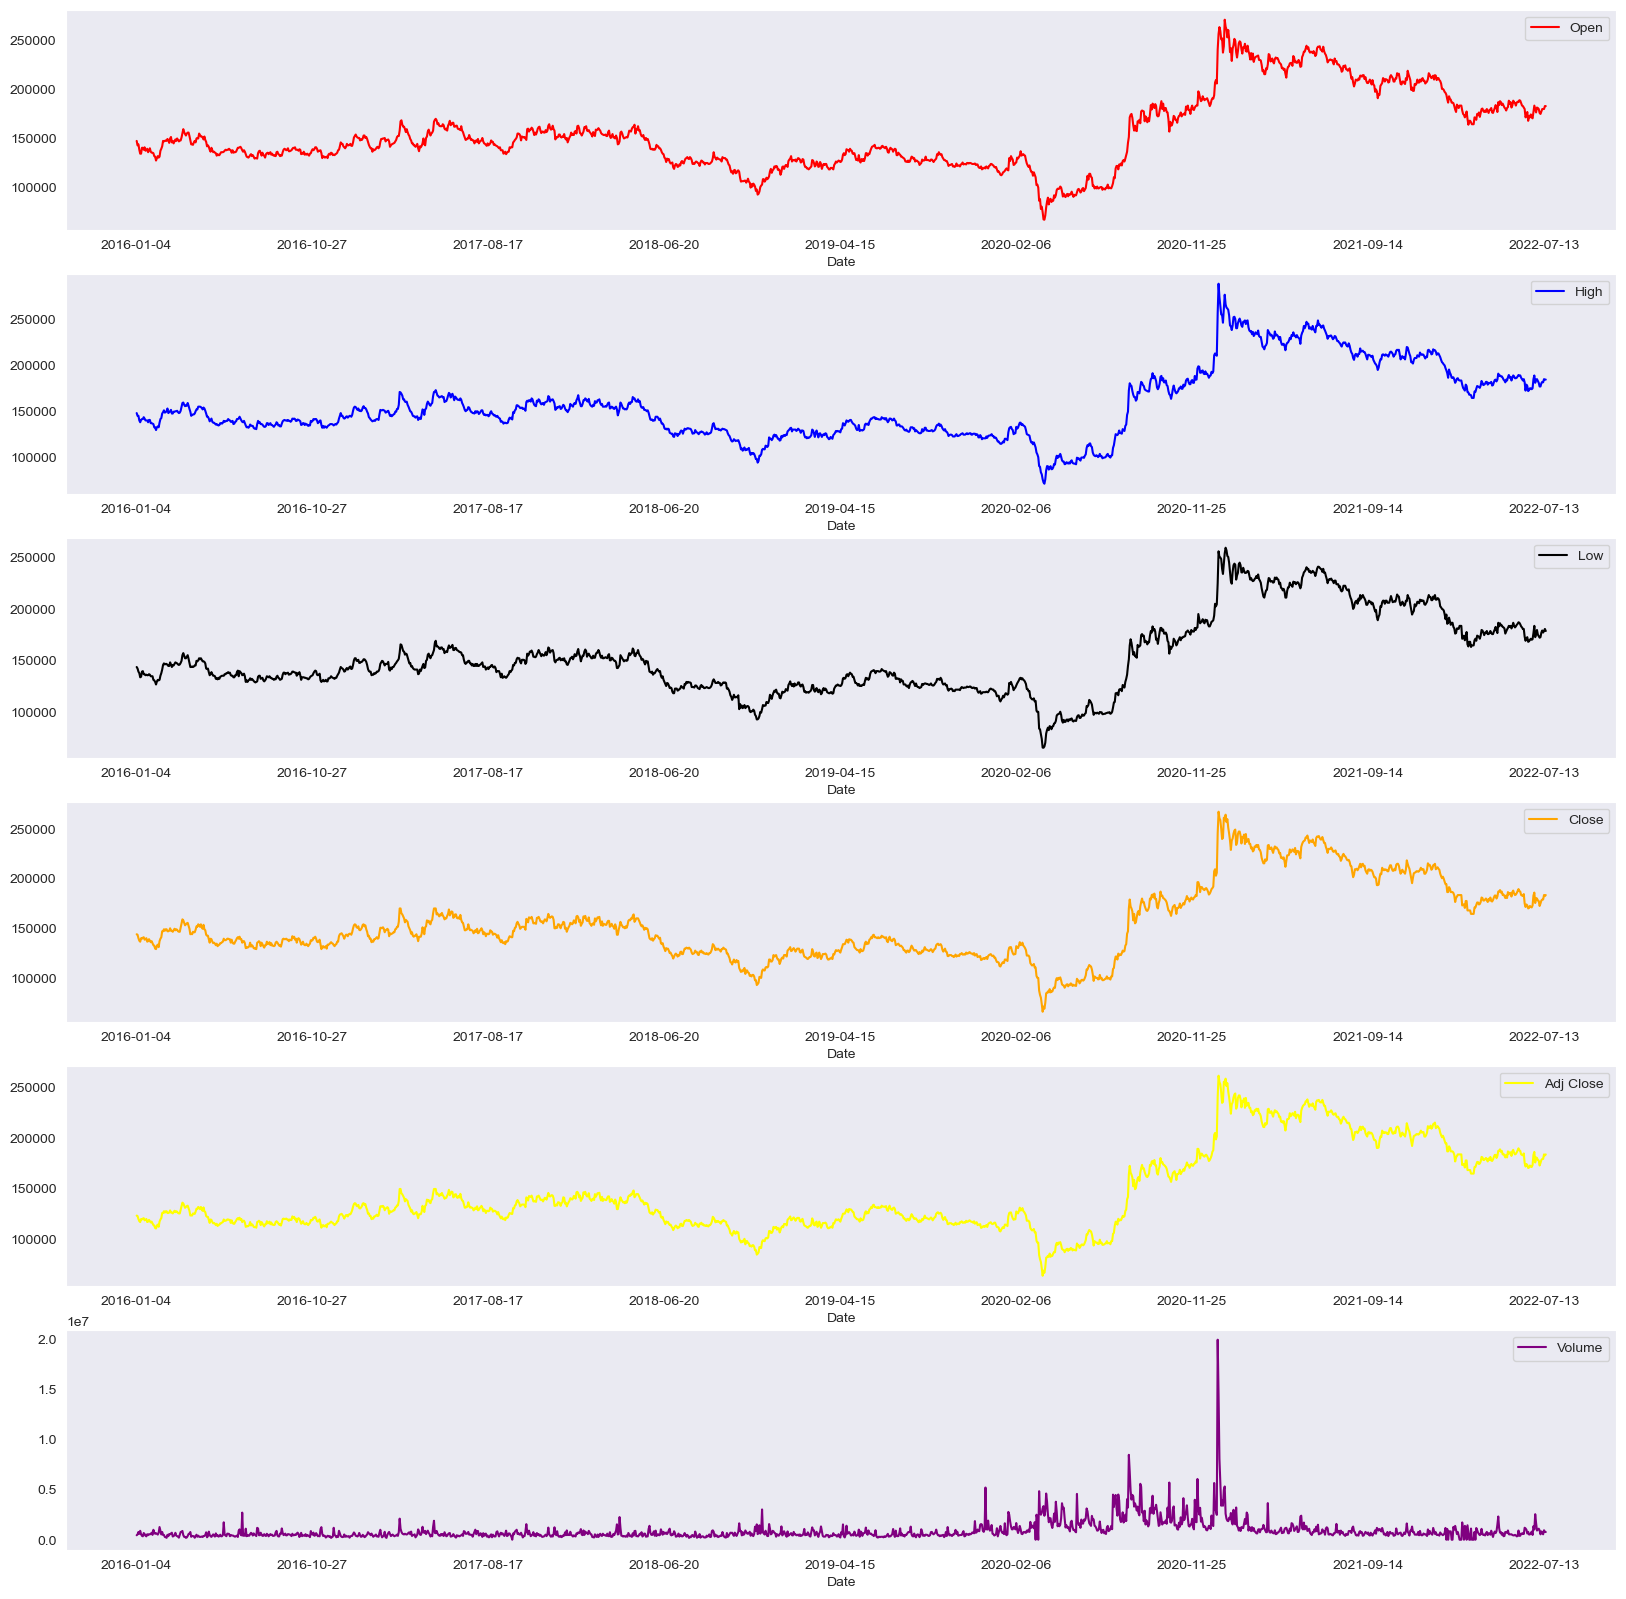

In [40]:
plt.figure(figsize=(20,20))
sns.set_style("dark")
plt.subplot(6,1,1)
df["Open"].plot(color="red")
plt.legend()

plt.subplot(6,1,2)
df["High"].plot(color="blue")
plt.legend()

plt.subplot(6,1,3)
df["Low"].plot(color="black")
plt.legend()

plt.subplot(6,1,4)
df["Close"].plot(color="orange")
plt.legend()

plt.subplot(6,1,5)
df["Adj Close"].plot(color="yellow")
plt.legend()

plt.subplot(6,1,6)
df["Volume"].plot(color="purple")
plt.legend()

In [44]:
maxthreshold=df["Open"].quantile(0.95)
minthreshold=df["Open"].quantile(0.05)


In [42]:
df[df["Open"]>maxthreshold]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-08,240500.0,257000.0,225000.0,246000.0,240400.203125,19933702
2021-01-11,256500.0,289000.0,256000.0,267500.0,261410.781250,14433887
2021-01-12,263500.0,274500.0,250500.0,261000.0,255058.750000,8040182
2021-01-13,259500.0,265000.0,250000.0,259000.0,253104.281250,5805649
2021-01-14,251000.0,255500.0,248500.0,250500.0,244797.765625,3389733
...,...,...,...,...,...,...
2021-07-05,239000.0,240000.0,235000.0,236000.0,231588.781250,861912
2021-07-06,236500.0,238000.0,235500.0,236000.0,231588.781250,497009
2021-07-07,235000.0,235500.0,232000.0,232000.0,227663.546875,1122107


In [45]:
df[df["Open"]<minthreshold]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-13,99900.0,102500.0,99600.0,102500.0,93099.960938,397209
2018-11-21,96500.0,97900.0,95800.0,97800.0,88830.992188,883111
2018-11-22,98000.0,98000.0,92500.0,92800.0,84289.531250,1527106
2018-11-23,92800.0,94000.0,92600.0,93700.0,85107.000000,558490
2018-11-26,93600.0,95800.0,93500.0,95100.0,86378.593750,663188
...,...,...,...,...,...,...
2020-07-06,99700.0,102500.0,98800.0,101500.0,97619.226563,1189877
2020-07-08,99200.0,101000.0,99100.0,99600.0,95791.875000,859735
2020-07-09,100000.0,101000.0,99600.0,99600.0,95791.875000,922604


In [47]:
final_df=df[(df["Open"]<maxthreshold) & (df["Open"]>minthreshold)]
final_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.101563,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.289063,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.398438,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.210938,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.562500,888701
...,...,...,...,...,...,...
2022-07-11,180000.0,182000.0,179000.0,179000.0,179000.000000,660814
2022-07-12,180000.0,181500.0,177000.0,179000.0,179000.000000,539027
2022-07-13,180000.0,185000.0,178500.0,183500.0,183500.000000,941277


In [48]:
print(df.shape,final_df.shape)

(1603, 6) (1439, 6)


In [57]:
x=final_df.drop(["Close"],axis=1)
y=final_df["Close"]

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,test_size=0.15,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
modelfit=lr.fit(x,y)

In [62]:
modpred=modelfit.predict(xtrain)
modpred

array([184218.3145324 , 167650.43807185, 125978.97696438, ...,
       156075.84403882, 230295.79552701, 206529.51894775])

In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
testpred=modelfit.predict(xtest)
print(r2_score(ytest,testpred))
print(mean_absolute_error(ytest,testpred))
print(mean_squared_error(ytest,testpred))

0.9987068645075867
853.0741148508126
1254764.982452918


In [63]:
modelfit.predict([[147500.0,148000.0,143500.0,122929.101563,445332]])

array([144731.69449889])